In [105]:
import numpy as np
import pandas as pd
import os

In [106]:
os.chdir('/Users/siddhantgond/PRojects/Project_1')

In [107]:
df = pd.read_csv('Online Retail.csv')

In [108]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [109]:
#Getting the information about the dataset 
print(df.info)

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [110]:
#Getting the basic statistics of numerical columns
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [111]:
#checking and removing the null values
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [112]:
df = df.dropna()

In [113]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [114]:
#CHecking and removing the duplicates
print(df.duplicated().sum())

5225


In [115]:
df = df.drop_duplicates()

In [116]:
print(df.duplicated().sum())

0


In [117]:
#Checking the datatypes of the columns
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [118]:
#We have to change the InvoiceDate data type of the object(string) to the DateTime format
# Corrected approach using .loc[]
df.loc[:, 'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [119]:
#Checking the datatypes of the columns
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [120]:
df.loc[:, 'CustomerID'] = df['CustomerID'].astype('int64')

In [121]:
#Checking the datatypes of the columns
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [122]:
#checking again the data frame to ensure it don't have any issue 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [123]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [124]:
df.duplicated().sum()

0

The data is cleaned. It've no data duplicates and null values. Now we are moving forward towards the Exploratory data analysis. This step involves exploring and visualizing your data to understand its structure, distribution, and relationships between variables.

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#Looking at the summary of the dataset
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604,401604,401604,401604.000000,401604,401604.000000,401604.000000,401604
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542,2065,2058,NaN,543,NaN,NaN,356728
mean,NaN,NaN,NaN,12.183273,NaN,3.474064,15281.160818,NaN
std,NaN,NaN,NaN,250.283037,NaN,69.764035,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,5.000000,NaN,1.950000,15145.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16784.000000,NaN


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


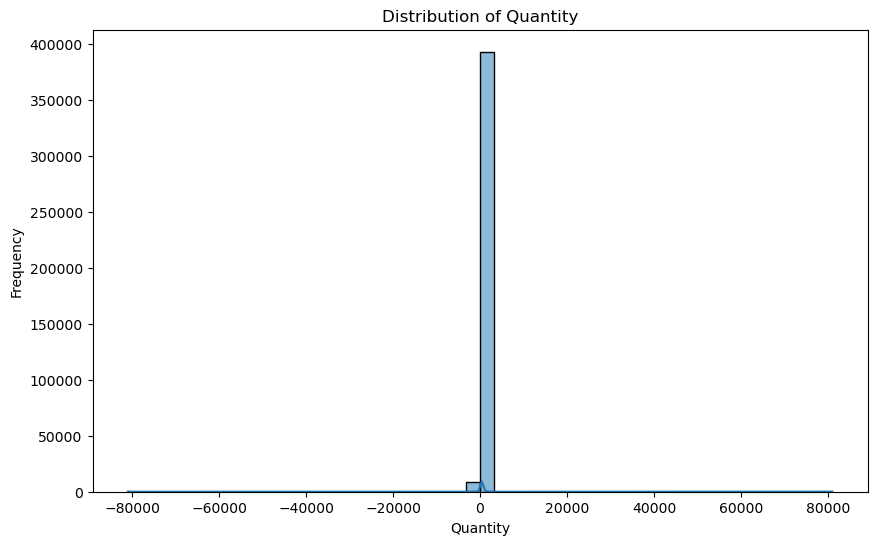

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


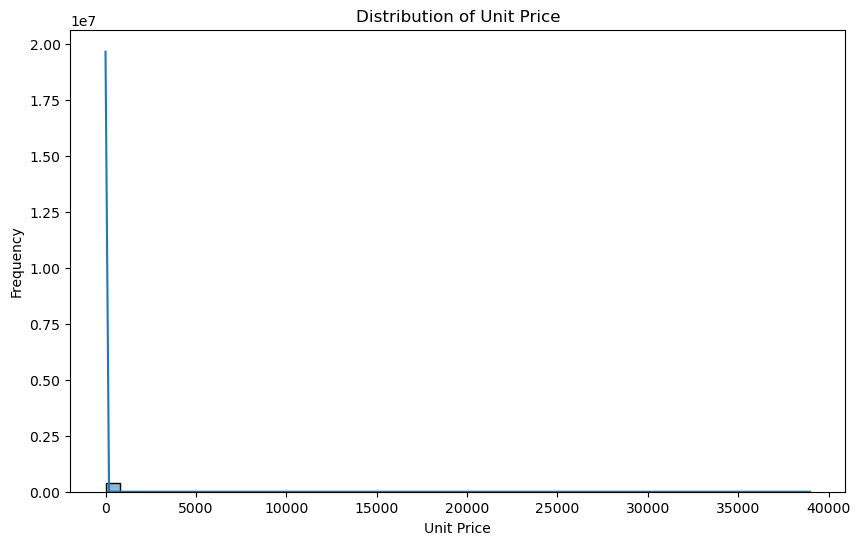

In [128]:
#visualizing the distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Distribution of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

In [129]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with zero
df.fillna(0, inplace=True)


In [130]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604,401604,401604,401604.000000,401604,401604.000000,401604.000000,401604
unique,22190,3684,3896,NaN,NaN,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542,2065,2058,NaN,NaN,NaN,NaN,356728
mean,NaN,NaN,NaN,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [131]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with zero
df.fillna(0, inplace=True)


In [132]:
# Summary statistics
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604,401604,401604,401604.000000,401604,401604.000000,401604.000000,401604
unique,22190,3684,3896,NaN,NaN,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542,2065,2058,NaN,NaN,NaN,NaN,356728
mean,NaN,NaN,NaN,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


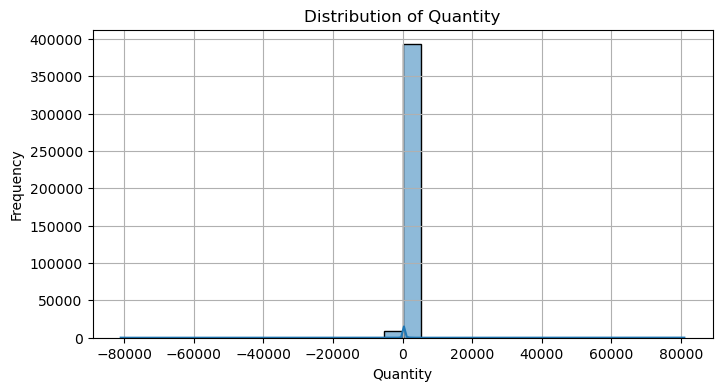

In [133]:
# Distribution of Quantity
plt.figure(figsize=(8, 4))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
# plt.xlim(0,25000)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


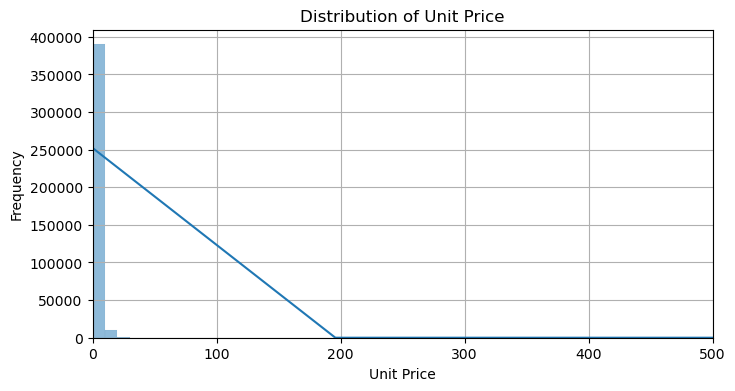

In [134]:

# Distribution of UnitPrice
plt.figure(figsize=(8, 4))
sns.histplot(df['UnitPrice'], bins=np.arange(0, 1000, 10), kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 500)
plt.show()


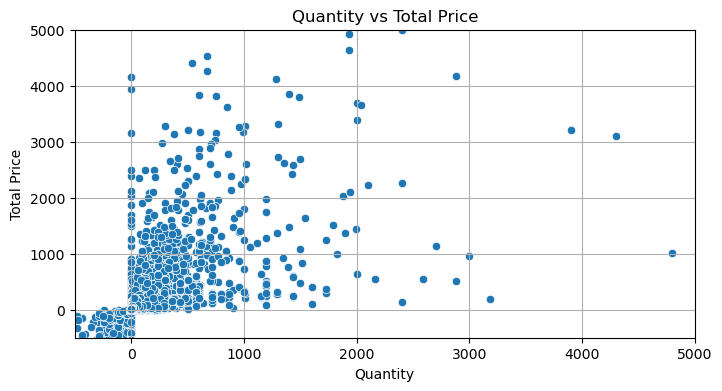

In [135]:
# Creating a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Scatter plot of Quantity vs TotalPrice
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df)
plt.title('Quantity vs Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.grid(True)
plt.xlim(-500,5000)
plt.ylim(-500,5000)
plt.show()

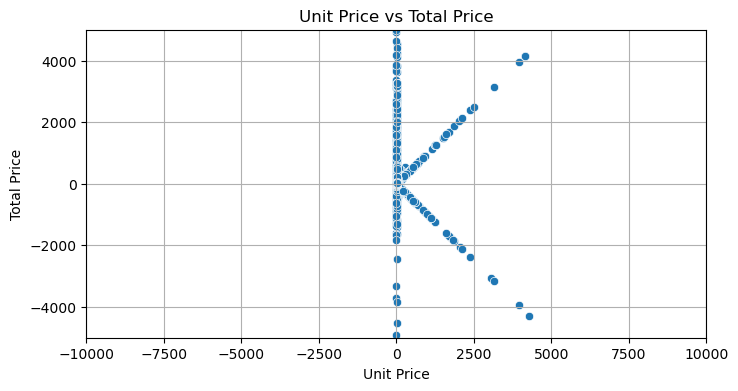

In [136]:
# Scatter plot of UnitPrice vs TotalPrice
plt.figure(figsize=(8, 4))
sns.scatterplot(x='UnitPrice', y='TotalPrice', data=df)
plt.title('Unit Price vs Total Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.grid(True)
plt.xlim(-10000,10000)
plt.ylim(-5000,5000)
plt.show()

In [137]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'C536379'

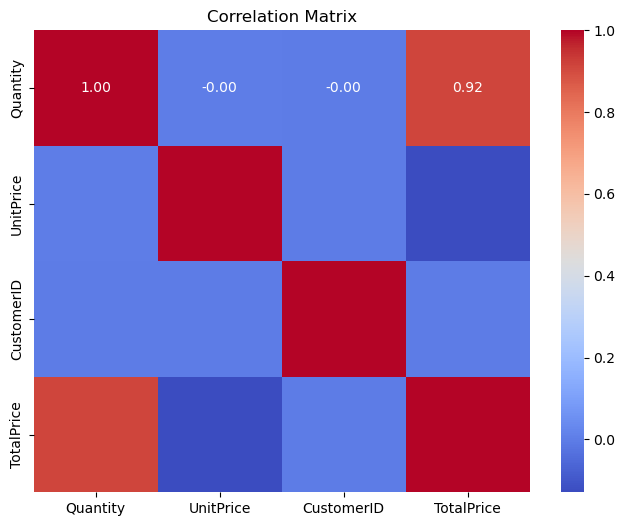

In [140]:
 # Selecting numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculating correlation matrix
corr = df[numeric_cols].corr()

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


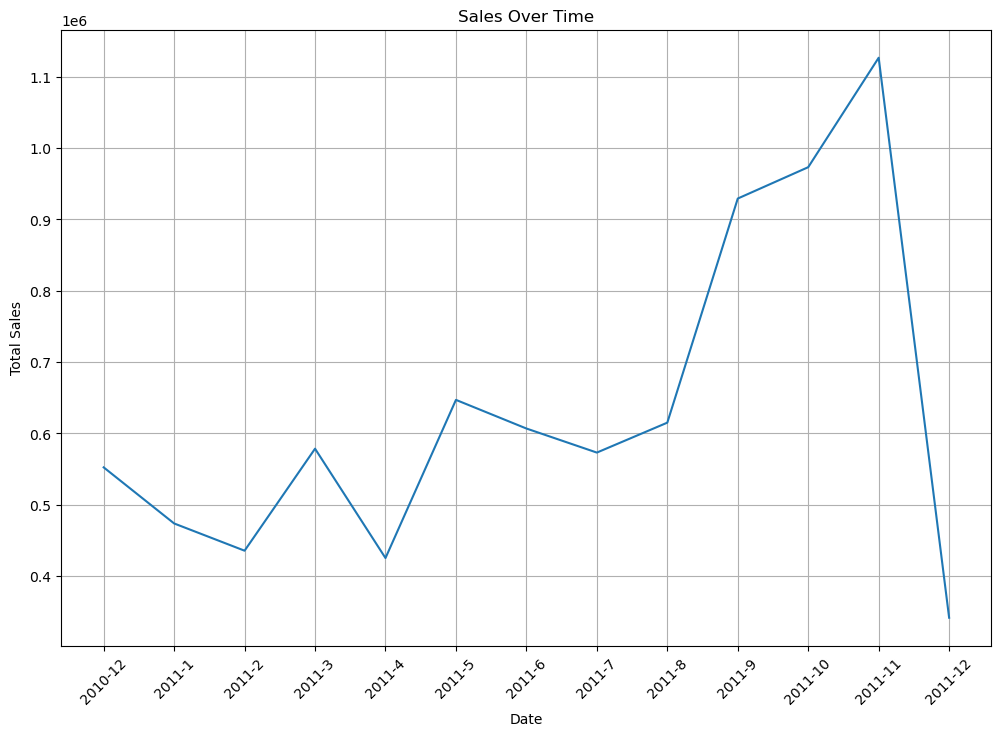

In [142]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, and day
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

# Sales over time
sales_over_time = df.groupby(['Year', 'Month']).agg({'TotalPrice': 'sum'}).reset_index()
sales_over_time['Date'] = sales_over_time['Year'].astype(str) + '-' + sales_over_time['Month'].astype(str)

plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='TotalPrice', data=sales_over_time)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


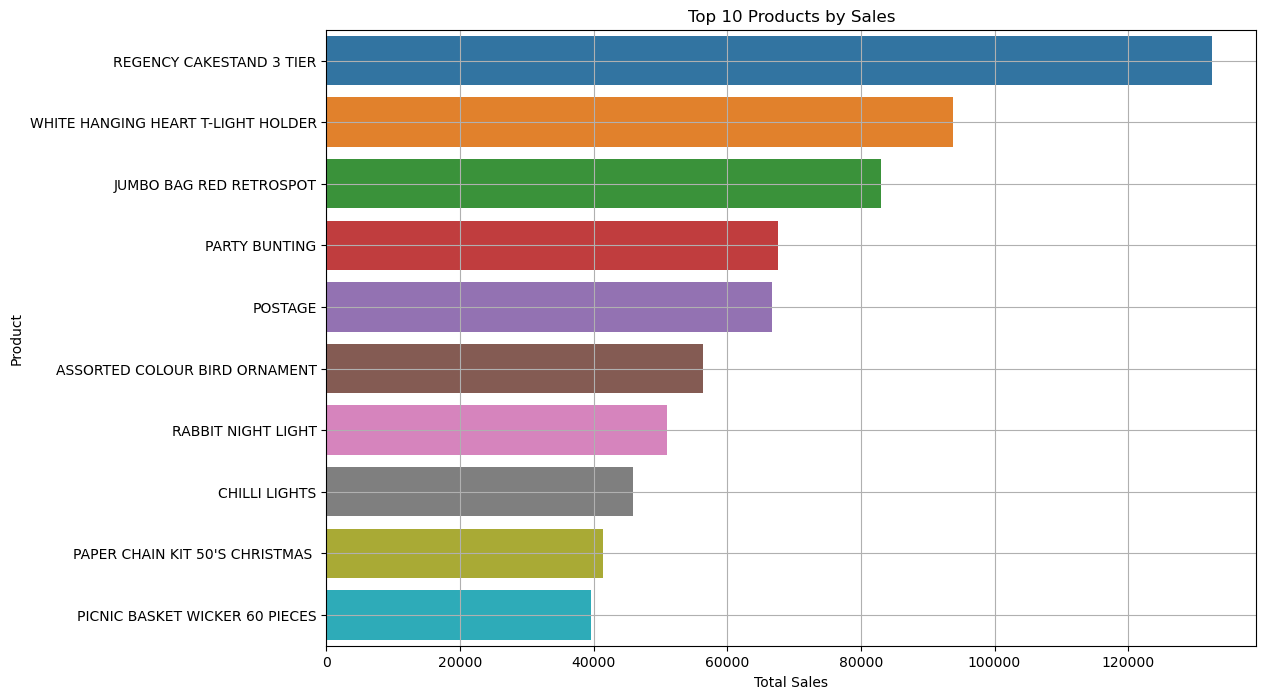

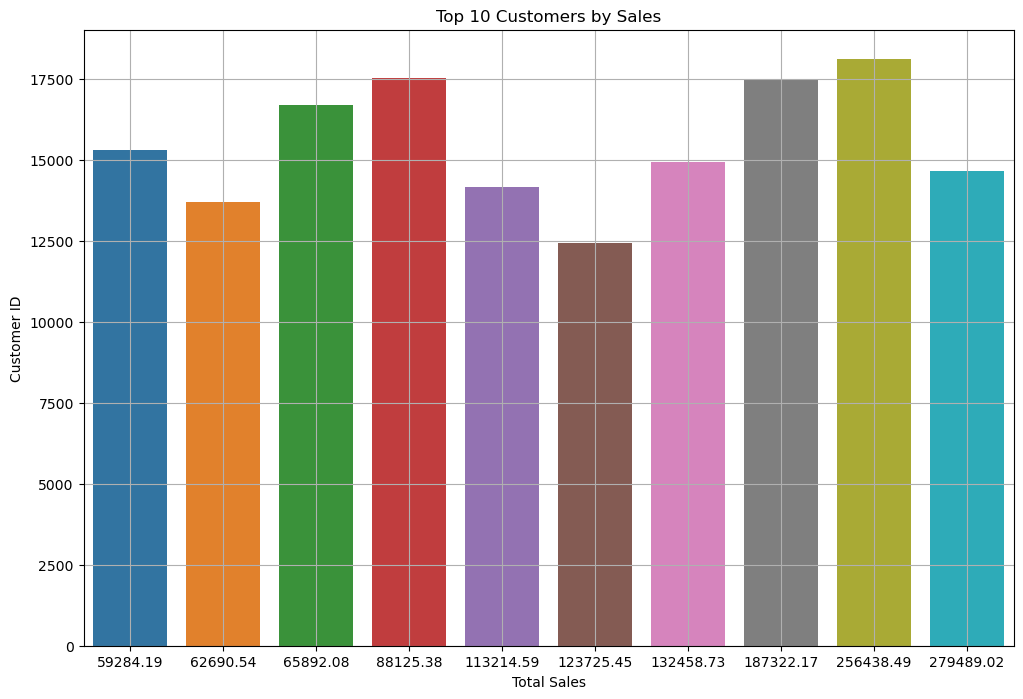

In [144]:
# Top 10 Products by Sales
top_products = df.groupby('Description').agg({'TotalPrice': 'sum'}).sort_values(by='TotalPrice', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products['TotalPrice'], y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.grid(True)
plt.show()

# Top 10 Customers by Sales
top_customers = df.groupby('CustomerID').agg({'TotalPrice': 'sum'}).sort_values(by='TotalPrice', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_customers['TotalPrice'], y=top_customers.index)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer ID')
plt.grid(True)
plt.show()


In [146]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [148]:
#Calculatin the RFM values:

# Set a reference date for recency calculation (e.g., one day after the last invoice date)
reference_date = df['InvoiceDate'].max() + pd.DateOffset(1)

# Calculate Recency, Frequency, and Monetary values for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [150]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

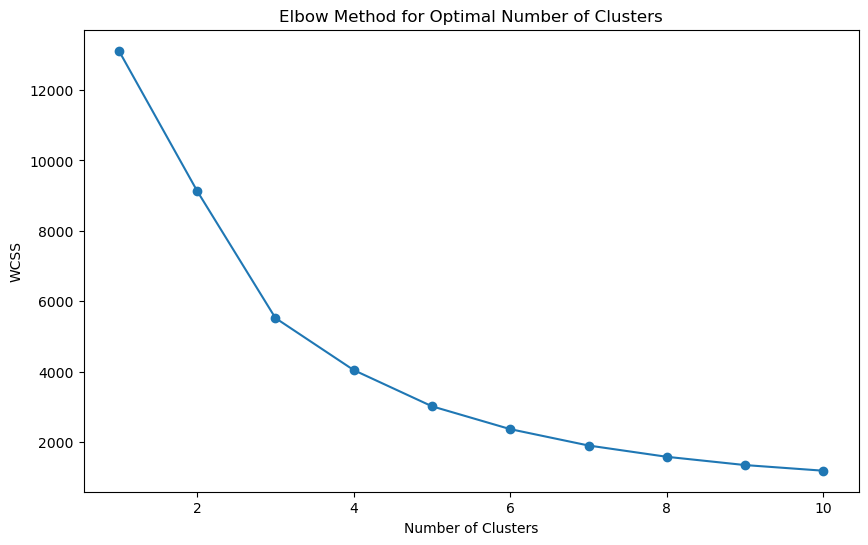

In [152]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [153]:
# Applying K-means clustering (assuming 4 clusters based on the Elbow Method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyzing the characteristics of each cluster
cluster_analysis = rfm.groupby('Cluster').mean()
print(cluster_analysis)

            Recency  Frequency       Monetary
Cluster                                      
0         41.606500   4.802461    1472.653251
1          7.666667  89.000000  182108.075000
2        247.951242   1.805888     451.802991
3          9.181818  40.672727   18435.663364


In [164]:
# Define the current date for recency calculation (usually the max date in the dataset)
current_date = df['InvoiceDate'].max()

# Calculate Recency
recency = df.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID', 'LastPurchaseDate']
recency['Recency'] = (current_date - recency['LastPurchaseDate']).dt.days

In [172]:
#Calculating frequency
frequency = df.groupby('CustomerID').InvoiceNo.nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

print(frequency)
print(frequency.columns)

      CustomerID  Frequency
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4367     18280.0          1
4368     18281.0          1
4369     18282.0          3
4370     18283.0         16
4371     18287.0          3

[4372 rows x 2 columns]
Index(['CustomerID', 'Frequency'], dtype='object')


In [176]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID').TotalPrice.sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

print(monetary)
print(monetary.columns )

      CustomerID  Monetary
0        12346.0      0.00
1        12347.0   4310.00
2        12348.0   1797.24
3        12349.0   1757.55
4        12350.0    334.40
...          ...       ...
4367     18280.0    180.60
4368     18281.0     80.82
4369     18282.0    176.60
4370     18283.0   2045.53
4371     18287.0   1837.28

[4372 rows x 2 columns]
Index(['CustomerID', 'Monetary'], dtype='object')


In [182]:
rfm = recency.merge(frequency, on='CustomerID')
rfm = rfm.merge(monetary, on='CustomerID')
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60
4368,18281.0,2011-06-12 10:53:00,180,1,80.82
4369,18282.0,2011-12-02 11:43:00,7,3,176.60
4370,18283.0,2011-12-06 12:02:00,3,16,2045.53


In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


rfm_scaled 

array([[ 2.32202285, -0.32936215, -0.23041952],
       [-0.89373323,  0.20610242,  0.29405454],
       [-0.1691956 , -0.11517632, -0.01171748],
       ...,
       [-0.83418219, -0.22226923, -0.20892947],
       [-0.87388289,  1.16993863,  0.01849636],
       [-0.48680114, -0.22226923, -0.00684511]])

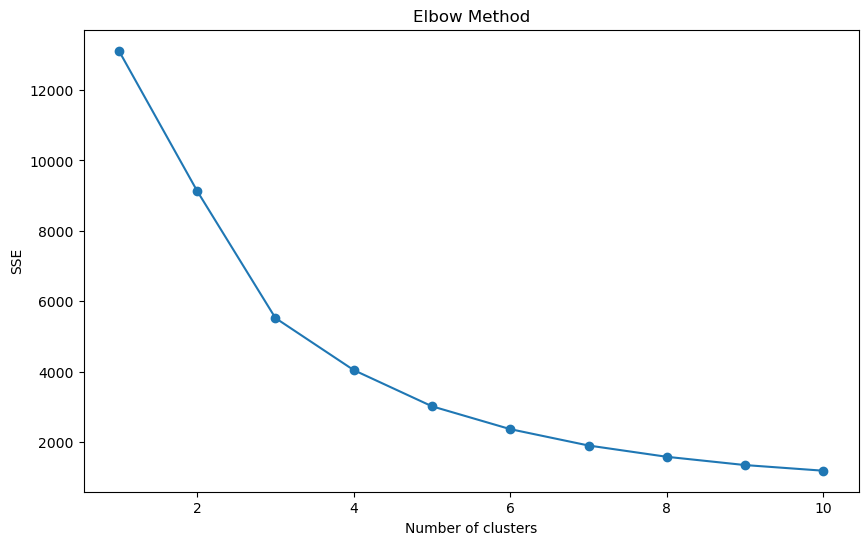

In [200]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [193]:
optimal_clusters = 4  # Replace with the number identified from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [196]:
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()
cluster_analysis.columns = ['Cluster', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']
print(cluster_analysis)


   Cluster  Avg_Recency  Avg_Frequency   Avg_Monetary  Customer_Count
0        0    40.606500       4.802461    1472.653251            3169
1        1     6.666667      89.000000  182108.075000               6
2        2   246.951242       1.805888     451.802991            1087
3        3     8.181818      40.672727   18435.663364             110


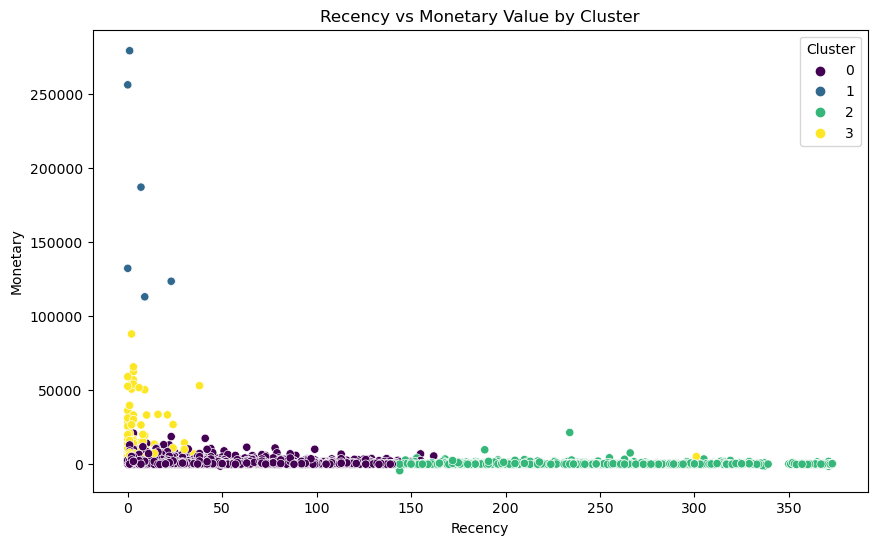

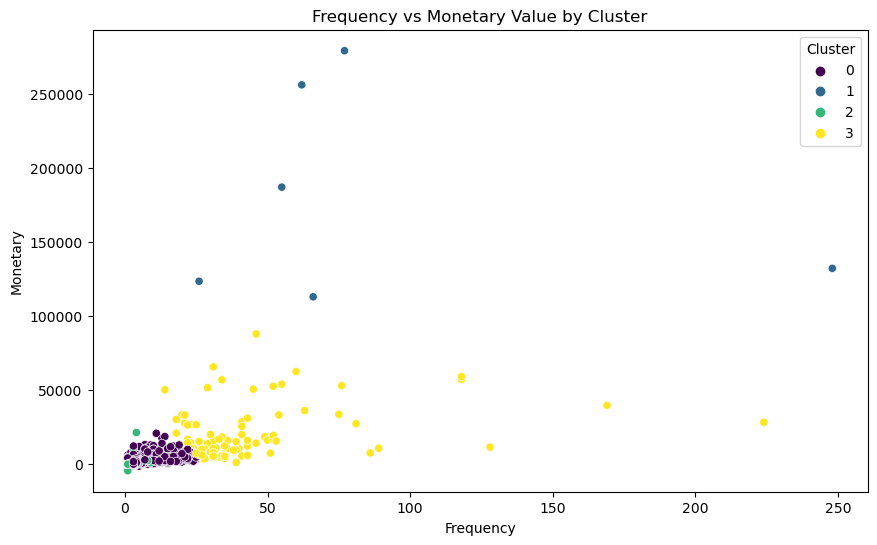

In [198]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Recency vs Monetary Value by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Frequency vs Monetary Value by Cluster')
plt.show()
